In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import squarify
from mplsoccer import Pitch

##### Premier League Player Dataset 2020 - 2021

In [2]:
table = pd.read_csv('./dataset/EPL_20_21.csv')

##### Set to Liverpool Player Dataset

In [34]:
# List Pemain Depan Liverpool
liv_df = table[table['Club'] == 'Liverpool FC']
liv_df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
80,Andrew Robertson,Liverpool FC,SCO,DF,26,38,38,3383,1,7,3214,79.9,0,0,0.04,0.18,2,0
81,Mohamed Salah,Liverpool FC,EGY,FW,28,37,34,3078,22,5,1288,83.2,6,6,0.61,0.18,0,0
82,Trent Alexander-Arnold,Liverpool FC,ENG,DF,21,36,34,3031,2,7,2941,75.3,0,0,0.08,0.24,2,0
83,Georginio Wijnaldum,Liverpool FC,NED,MF,29,38,34,2941,2,0,1747,93.3,0,0,0.10,0.05,1,0
84,Alisson,Liverpool FC,BRA,GK,27,33,33,2970,1,0,1137,85.2,0,0,0.00,0.00,1,0
85,Roberto Firmino,Liverpool FC,BRA,FW,28,36,33,2838,9,7,1308,79.7,0,0,0.40,0.20,2,0
86,Sadio Mané,Liverpool FC,SEN,FW,28,35,31,2810,11,7,1064,75.4,0,0,0.49,0.18,3,0
87,Fabinho,Liverpool FC,BRA,"DF,MF",26,30,28,2567,0,0,2049,91.1,0,0,0.02,0.01,6,0
88,Thiago Alcántara,Liverpool FC,ESP,MF,29,24,20,1854,1,0,1674,89.5,0,0,0.07,0.11,4,0
89,Jordan Henderson,Liverpool FC,ENG,"MF,DF",30,21,20,1704,1,1,1812,86.8,0,0,0.09,0.07,0,0


##### See Liverpool Forward Goals in 2020 - 2021 Season

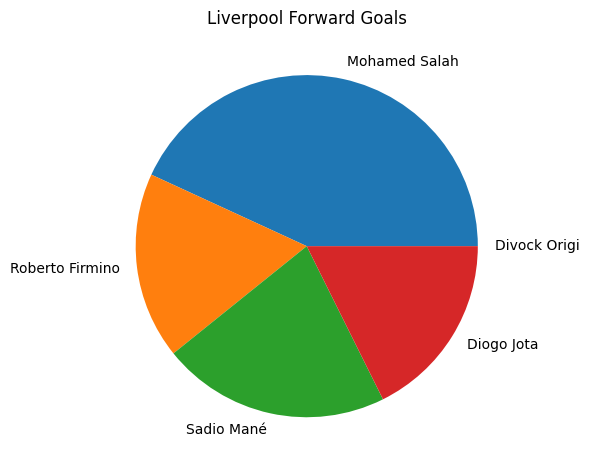

In [4]:
# Set Liverpool forward dataset goals
liverpool_forward = liv_df[liv_df['Position'] == 'FW']
fw = liverpool_forward[['Name', 'Goals', 'Assists']].reset_index(drop=True)
df = pd.DataFrame(fw, columns=['Name', 'Goals', 'Assists'])

# pie chart based on goals
plt.pie(df['Goals'], labels=df['Name'])
plt.title("Liverpool Forward Goals")
plt.tight_layout()

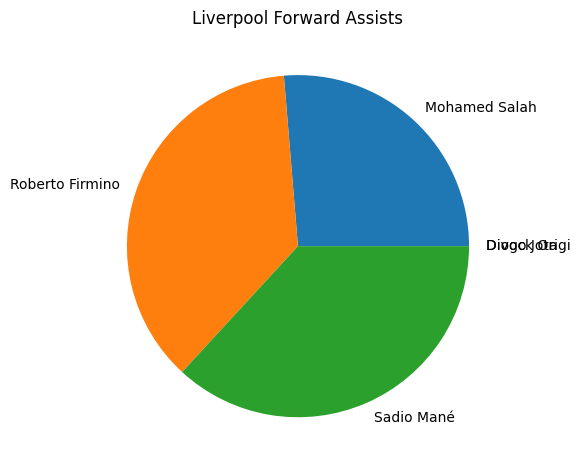

In [5]:
# pie chart based on goals
plt.pie(df['Assists'], labels=df['Name'])
plt.title("Liverpool Forward Assists")
plt.tight_layout()

##### Manchester City

In [11]:
# man city squad
man_city_squad = table[table['Club'] == 'Manchester City']
man_city_squad[['Name','Goals']]

,Name,Goals
27,Ederson,0
28,Rúben Dias,1
29,Rodri,2
30,Raheem Sterling,10
31,João Cancelo,2
32,Bernardo Silva,2
33,İlkay Gündoğan,13
34,Kevin De Bruyne,6
35,Riyad Mahrez,9
36,Gabriel Jesus,9


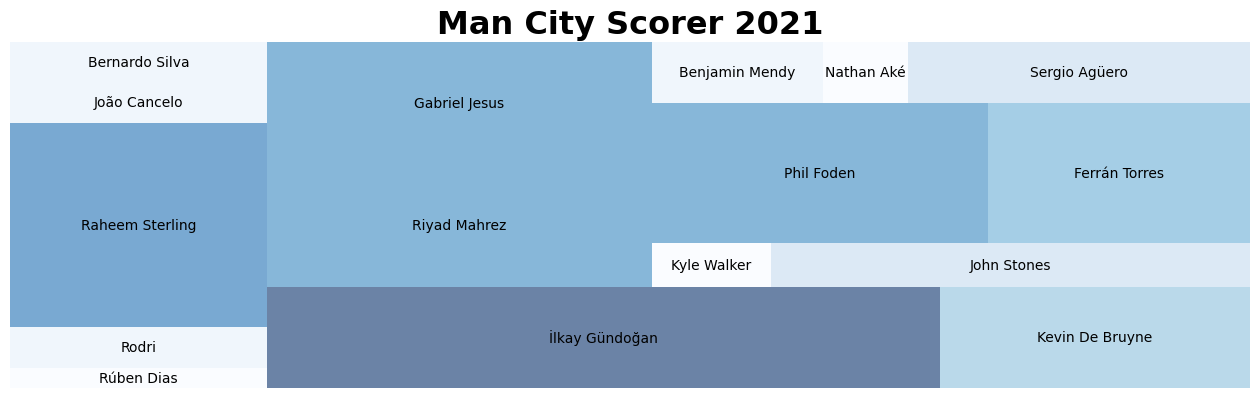

In [8]:
# Get the data of man city goal scorer
man_city_scorer = man_city_squad[man_city_squad['Goals'] > 0]

normalize = matplotlib.colors.Normalize(vmin=min(man_city_scorer.Goals), vmax=max(man_city_scorer.Goals))
colors = [matplotlib.cm.Blues(normalize(value)) for value in man_city_scorer.Goals]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)


squarify.plot(label=man_city_scorer.Name, sizes=man_city_scorer.Goals, color=colors, alpha=.6)
plt.title("Man City Scorer 2021", fontsize=23, fontweight='bold')

plt.axis('off')
plt.show()

# Liverpool FC VS Manchester City Stats

In [64]:
# Retrieve dataset from local computer
data_table = pd.read_csv('./dataset/results.csv', encoding='windows-1252')
data_table.head()

# Define dataset list variable
dataset = list()

# Cleaning dataset
liv_away = data_table[(data_table['AwayTeam'] == 'Liverpool') & (data_table['HomeTeam'] == 'Man City')].reset_index(drop=True)
liv_home = data_table[(data_table['HomeTeam'] == 'Liverpool') & (data_table['AwayTeam'] == 'Man City')].reset_index(drop=True)

# Append the dataset
dataset.append(liv_away)
dataset.append(liv_home)

# Cleaning, Concat and set the data to DataFrame
data_concat = pd.concat(dataset)
data_concat_to_df = pd.DataFrame(data_concat)
used_column = data_concat_to_df[['Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']].dropna().reset_index(drop=True)
df = used_column.rename(columns={'HomeTeam': 'Home', 'AwayTeam': 'Away', 'FTHG': 'Full Time Home Goals', 'FTAG': 'Full Time Away Goals', 'FTR': 'Results Winner', 'HS': 'Home Shots', 'AS': 'Away Shots', 'HST': 'Home Shot On Target', 'AST': 'Away Shot On Target', 'HC': 'Home Clearance', 'AC': 'Away Clearance', 'HF': 'Home Fouls', 'AF': 'Away Fouls', 'HY': 'Home Yellow Cards', 'AY': 'Away Yellow Cards', 'HR': 'Home Red Cards', 'AR': 'Away Red Cards'})

In [65]:
df[['Season', 'Home', 'Away', 'Full Time Home Goals', 'Full Time Away Goals', 'Results Winner', 'Referee']]

,Season,Home,Away,Full Time Home Goals,Full Time Away Goals,Results Winner,Referee
0,2000-01,Man City,Liverpool,1,1,D,Peter Jones
1,2002-03,Man City,Liverpool,0,3,A,P Durkin
2,2003-04,Man City,Liverpool,2,2,D,M Riley
3,2004-05,Man City,Liverpool,1,0,H,M Riley
4,2005-06,Man City,Liverpool,0,1,A,A Wiley
5,2006-07,Man City,Liverpool,0,0,D,U Rennie
6,2007-08,Man City,Liverpool,0,0,D,U Rennie
7,2008-09,Man City,Liverpool,2,3,A,P Walton
8,2009-10,Man City,Liverpool,0,0,D,P Walton
9,2010-11,Man City,Liverpool,3,0,H,P Dowd


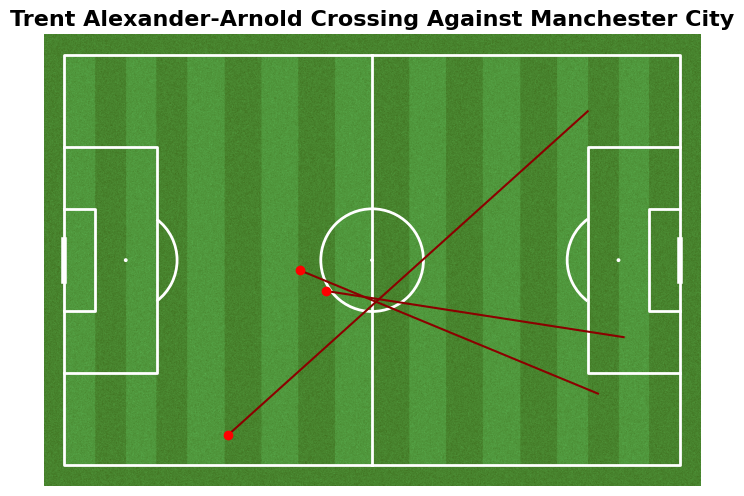

In [107]:
trent_data = pd.read_csv('./dataset/TAA-Passes - Sheet1.csv')

# fig, ax = plt.subplots()
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()
fig.set_size_inches(7, 5)

for i in range(len(trent_data)):
    plt.plot([int(trent_data['XSTART'][i]), int(trent_data['XEND'][i])],
             [int(trent_data['YSTART'][i]), int(trent_data['YEND'][i])],
             color='darkred')
    plt.plot(int(trent_data['XSTART'][i]), int(trent_data['YSTART'][i]), 'o', color='red')

plt.title('Trent Alexander-Arnold Crossing Against Manchester City', fontsize=16, fontweight='bold')
plt.show()